In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [150]:
TrainingSetdf = pd.read_csv("BATADAL_dataset03.csv", parse_dates=True, index_col='DATETIME', dayfirst=True)
EvalSetdf=pd.read_csv("BATADAL_dataset04.csv", parse_dates=True, index_col='DATETIME', dayfirst=True)


In [151]:
CorrelationMapSet=pd.read_csv("BATADAL_dataset03.csv", parse_dates=True, index_col='DATETIME', dayfirst=True)
del CorrelationMapSet['ATT_FLAG']
corr = CorrelationMapSet.corr()

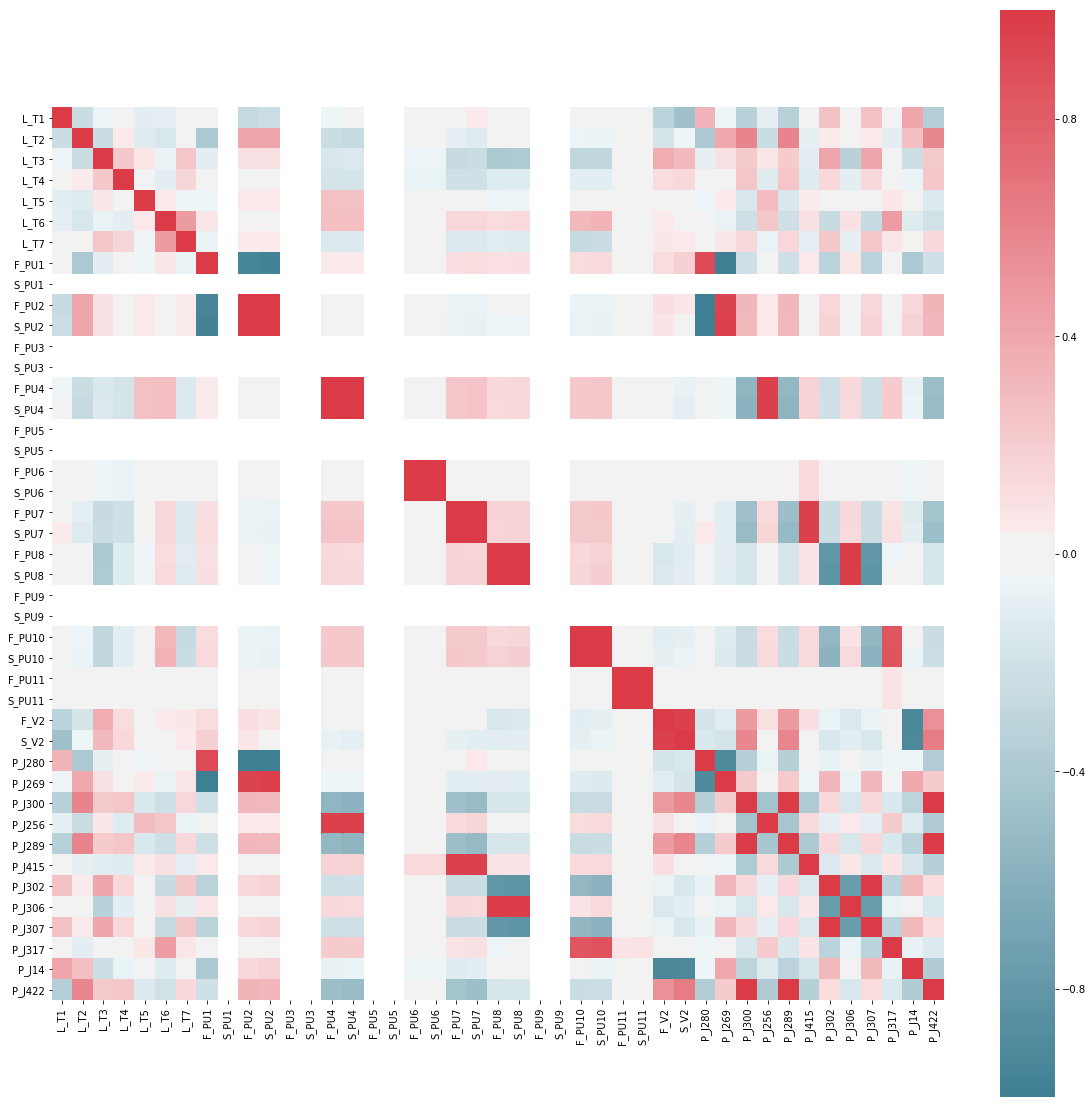

In [152]:

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

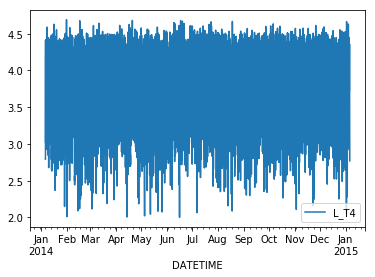

In [153]:
TrainingSetdf.plot( y='L_T4')

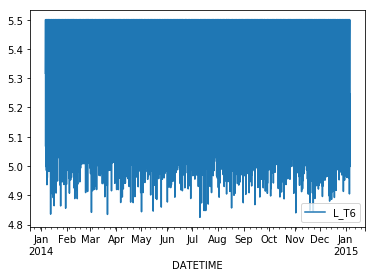

In [154]:
TrainingSetdf.plot( y='L_T6')

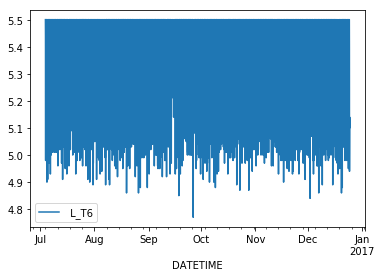

In [155]:
EvalSetdf.plot(y=' L_T6')

In [156]:
#####Persistence model to predict next values###########
values = TrainingSetdf.F_V2
ShiftedValues = pd.concat([values.shift(1), values], axis=1)
ShiftedValues.columns = ['t-1', 't+1']
print(ShiftedValues.head(5))
ShiftedValues=ShiftedValues.iloc[1:]
print(ShiftedValues.head(5))

                           t-1        t+1
DATETIME                                 
2014-01-06 00:00:00        NaN  81.605408
2014-01-06 01:00:00  81.605408  81.181030
2014-01-06 02:00:00  81.181030  83.643311
2014-01-06 03:00:00  83.643311  87.657402
2014-01-06 04:00:00  87.657402  88.074234
                           t-1        t+1
DATETIME                                 
2014-01-06 01:00:00  81.605408  81.181030
2014-01-06 02:00:00  81.181030  83.643311
2014-01-06 03:00:00  83.643311  87.657402
2014-01-06 04:00:00  87.657402  88.074234
2014-01-06 05:00:00  88.074234  73.405769


In [157]:
trainSet=ShiftedValues.values
train_X, train_Y = trainSet[:,0], trainSet[:,1]



In [158]:
EvalSetdf[" F_V2"]
valuesEval = EvalSetdf[" F_V2"]
ShiftedValuesEval = pd.concat([valuesEval.shift(1), valuesEval], axis=1)
ShiftedValuesEval.columns = ['t-1', 't+1']
print(ShiftedValuesEval.head(5))
ShiftedValuesEval=ShiftedValuesEval.iloc[1:]
print(ShiftedValuesEval.head(5))

                     t-1  t+1
DATETIME                     
2016-07-04 00:00:00  NaN  0.0
2016-07-04 01:00:00  0.0  0.0
2016-07-04 02:00:00  0.0  0.0
2016-07-04 03:00:00  0.0  0.0
2016-07-04 04:00:00  0.0  0.0
                     t-1  t+1
DATETIME                     
2016-07-04 01:00:00  0.0  0.0
2016-07-04 02:00:00  0.0  0.0
2016-07-04 03:00:00  0.0  0.0
2016-07-04 04:00:00  0.0  0.0
2016-07-04 05:00:00  0.0  0.0


In [159]:
testSet=ShiftedValuesEval.values
test_X, test_Y = testSet[:,0], testSet[:,1]

In [160]:
def model_persistence(x):
    return x

Test MSE: 0.436


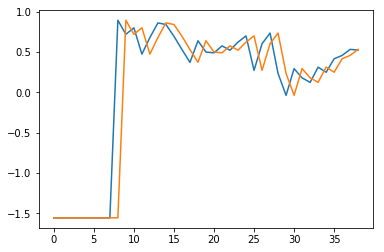

In [161]:
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_Y=(test_Y-np.mean(test_Y))/np.std(test_Y)
predictions=(predictions-np.mean(predictions))/np.std(predictions)
test_score = mean_squared_error(test_Y, predictions)
print('Test MSE: %.3f' % test_score)
 


plt.plot(test_Y[1:40])
plt.plot(predictions[1:40])
plt.show()